### Hello World of Machine Learning - classification of iris flowers  
*Dr. Fisher's Iris data set* is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.   

1. Attributes are numeric.
2. Small datset, easily fits into memory.  
    - 150 samples
    - 3 labels: species of Iris (Iris setosa, Iris virginica and Iris versicolor)
    - 4 features: Sepal length, Sepal width, Petal length, Petal Width in cm 
3. All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.
4. It is a classification problem, an easier type of supervised learning algorithm.
5. It is a multi-class classification problem (multi-nominal) that may require some specialized handling.


In [1]:
import pandas as pd
from random import randint

from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter("ignore")

#### Load dataset

In [2]:
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
dataset = pd.read_csv('../Data/iris_data.csv')

dataset.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor


#### Make training set  
Split the dataset into two,   
80% of which we will use to train, evaluate and select among our models,  
and 20% that we will hold back as a validation dataset.  
sk-learn has a method to split the dataset to tranining and test tests.   

In [3]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

The above is equal to the following code   
- use sample with frac=1 to shuffle the dataframe
- reset the indices since they change after shuffling the dataframe  
- select top 120 rows for training and  
- bottom 30 rows for testing/validation

In [4]:
df = pd.read_csv('../Data/iris_data.csv')
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.head(120)
df_test = df.tail(30)

X_train_ = df_train.iloc[: , :4].values.tolist()    
X_validation_ = df_test.iloc[: , :4].values.tolist()    
Y_train_ = df_train.iloc[: , -1:].values.tolist()   
Y_validation_ = df_test.iloc[: , -1:].values.tolist()

In [5]:
print("\nTrain and validation sets using sci-kit learn:", end = ' ')
for sample in [X_train, X_validation, Y_train, Y_validation]:
    print(f"{len(sample)}", end = ' ')
    
print("\nTrain and validation sets using Python code:  ", end = ' ')
for sample in [X_train_, X_validation_, Y_train_, Y_validation_]:
    print(f"{len(sample)}", end = ' ')    


Train and validation sets using sci-kit learn: 120 30 120 30 
Train and validation sets using Python code:   120 30 120 30 

#### Build Model   
Create a model object  

In [6]:
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()

#### Train the model  
`fit()` method trains the model  
The model can now be used to predict target values for new inputs  
The model can be saved for later use/distribution    

In [7]:
tree_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

#### Make Predictions   
Predict target value for random row from test set.     
<u>Note</u>: the test was not exposed to the model while training.  

In [17]:
row = randint(2,30)
print(f'Sample Data:      {X_validation[row:row+1]}')
print(f'Real Target:      {Y_validation[row:row+1]}')
result = tree_classifier.predict(X_validation[row:row+1])
print(f'Predicted Target: {result}')

Sample Data:      [[5.8 2.6 4.0 1.2]]
Real Target:      ['Iris-versicolor']
Predicted Target: ['Iris-versicolor']


#### Check Accuracy   
Accuracy is checked by comparing the predictions for each value of X_validation set  
with the tagged values (Y_validation) for the X_validation set.  

In [18]:
predictions = tree_classifier.predict(X_validation)
print(f"Prediction Accuracy: {accuracy_score(Y_validation, predictions):.2}")

Prediction Accuracy: 0.97


In [19]:
results = (zip(predictions, Y_validation))
for result in results:
    p, t = result[0], result[1]
    print(f"{p:17}{t:17}{1 if p==t else 0}")

Iris-setosa      Iris-setosa      1
Iris-versicolor  Iris-versicolor  1
Iris-versicolor  Iris-versicolor  1
Iris-setosa      Iris-setosa      1
Iris-virginica   Iris-virginica   1
Iris-versicolor  Iris-versicolor  1
Iris-virginica   Iris-virginica   1
Iris-setosa      Iris-setosa      1
Iris-setosa      Iris-setosa      1
Iris-virginica   Iris-virginica   1
Iris-versicolor  Iris-versicolor  1
Iris-setosa      Iris-setosa      1
Iris-virginica   Iris-virginica   1
Iris-versicolor  Iris-versicolor  1
Iris-versicolor  Iris-versicolor  1
Iris-setosa      Iris-setosa      1
Iris-versicolor  Iris-versicolor  1
Iris-versicolor  Iris-versicolor  1
Iris-setosa      Iris-setosa      1
Iris-setosa      Iris-setosa      1
Iris-versicolor  Iris-versicolor  1
Iris-versicolor  Iris-versicolor  1
Iris-virginica   Iris-versicolor  0
Iris-setosa      Iris-setosa      1
Iris-virginica   Iris-virginica   1
Iris-versicolor  Iris-versicolor  1
Iris-setosa      Iris-setosa      1
Iris-setosa      Iris-setosa

#### Evaluate predictions

In [20]:
from collections import Counter

print(f"\nAccuracy Score: {accuracy_score(Y_validation, predictions):.2}\n")
print(f"Actual flower types: {Counter(Y_validation)}\n")
print("Confusion Matrix:")
df = pd.DataFrame(confusion_matrix(Y_validation, predictions), 
                  index=['setosa','versicolor','virginica'], 
                  columns=['setosa','versicolor','virginica'])
print(df); print()
print("Classification Report:")
print(classification_report(Y_validation, predictions))


Accuracy Score: 0.97

Actual flower types: Counter({'Iris-versicolor': 13, 'Iris-setosa': 11, 'Iris-virginica': 6})

Confusion Matrix:
            setosa  versicolor  virginica
setosa          11           0          0
versicolor       0          12          1
virginica        0           0          6

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



---
### Predict with 6 different algorithms:  

Logistic Regression (LR)  
Linear Discriminant Analysis (LDA)  
K-Nearest Neighbors (KNN).  
Classification and Regression Trees (CART).  
Gaussian Naive Bayes (NB).  
Support Vector Machines (SVM).  

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Text(0.5, 1.0, 'Algorithm Comparison')

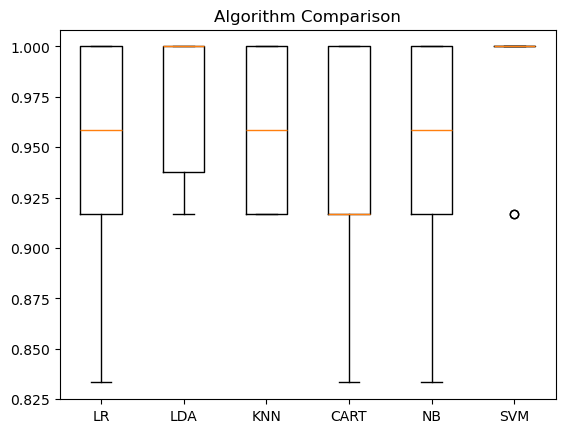

In [14]:
# Compare Algorithms

import matplotlib.pyplot as plt

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')